# Exploring Classification Models: A Comparative Study on a Simple Dataset
In this notebook, I explore and compare the performance of K-Nearest Neighbors (KNN), Naive Bayes, Logistic Regression, Support Vector Machines (SVM) and Neural Networks on the Heart Attack Analysis & Prediction Dataset. The goal is to understand how each model performs in predicting heart attack risk based on the dataset's features.

Source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df_full = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df_full.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Visualize Features

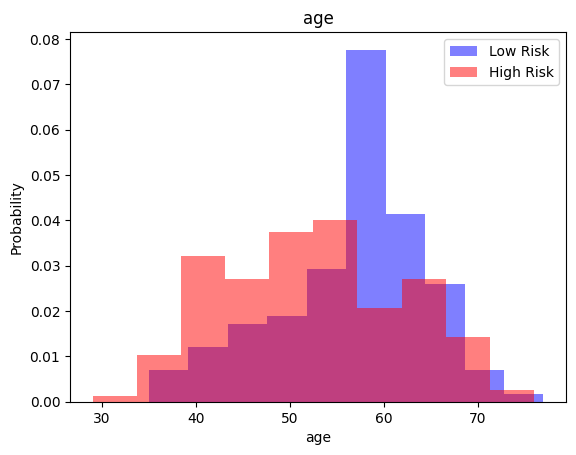

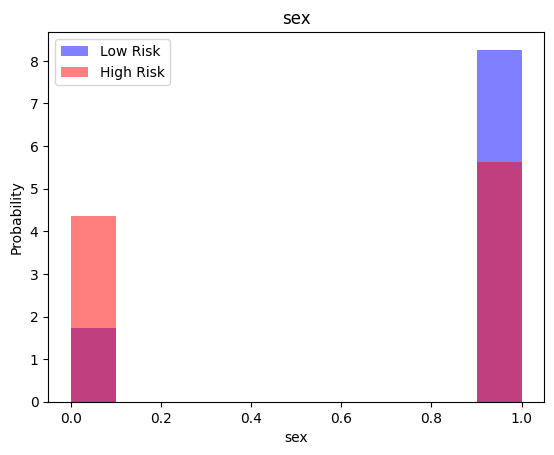

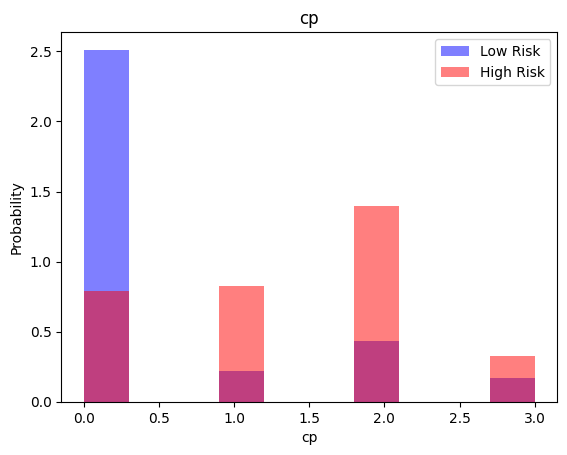

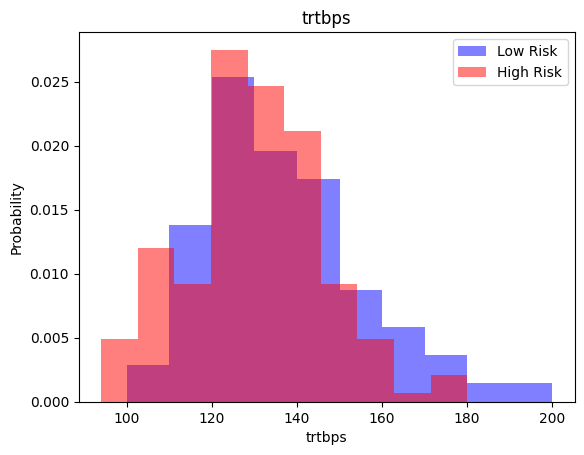

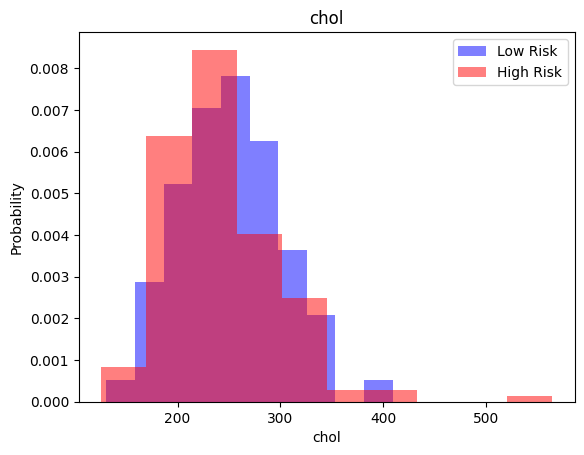

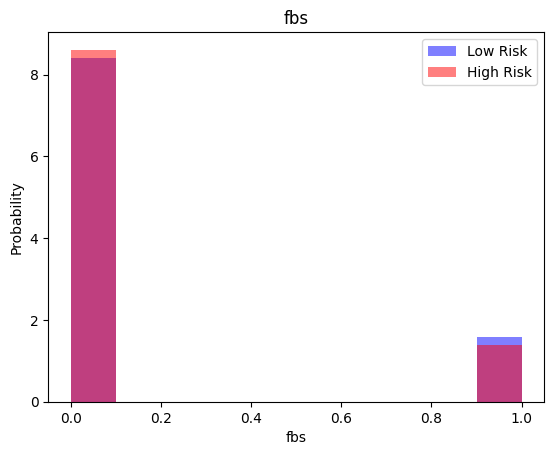

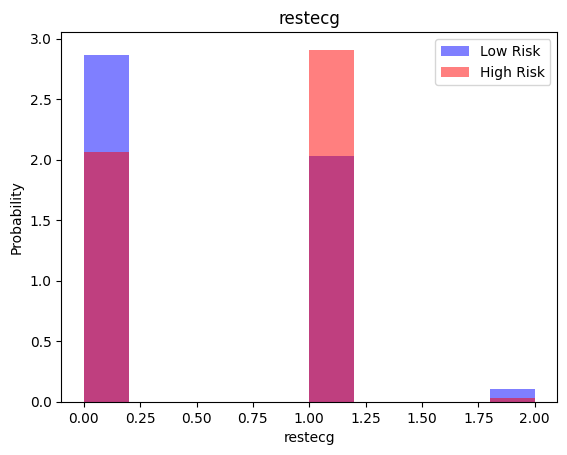

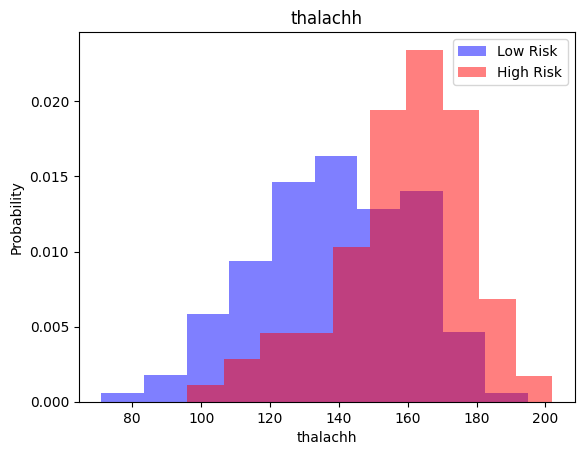

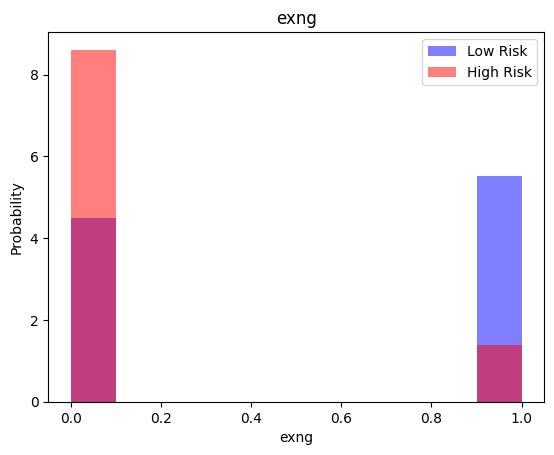

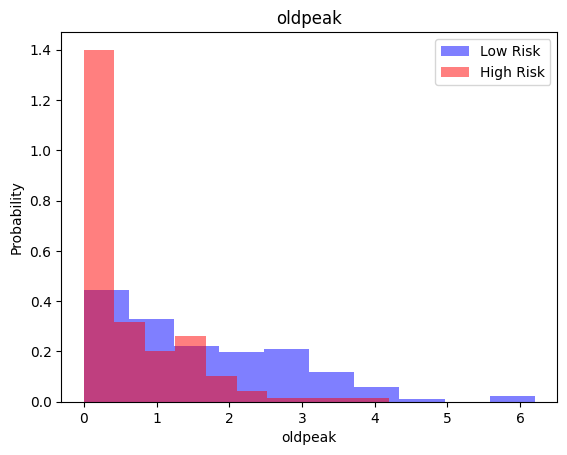

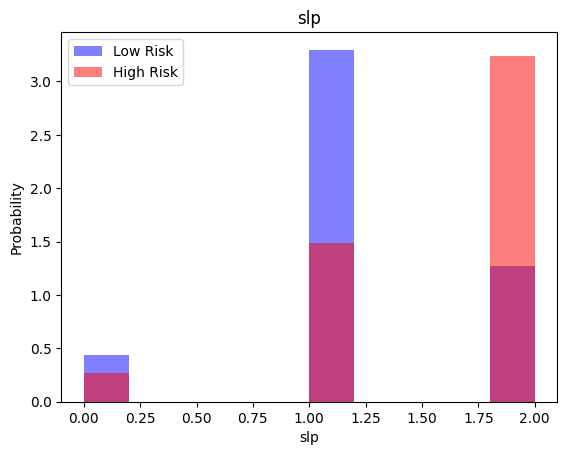

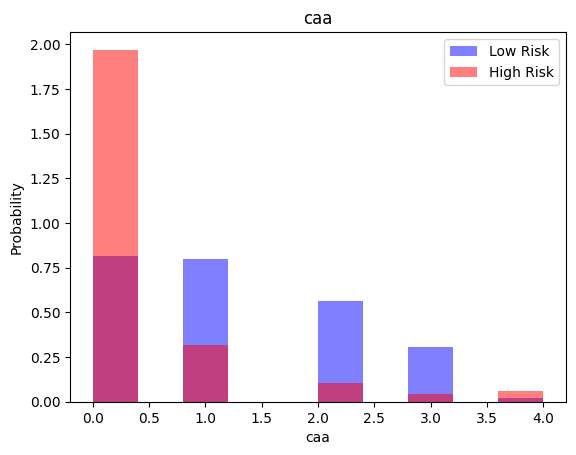

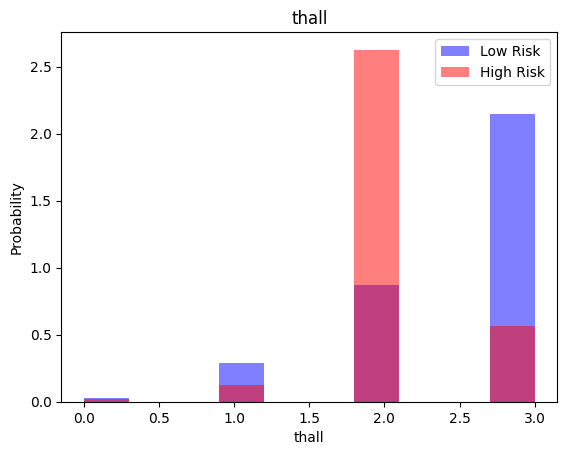

In [3]:
for feature in df_full.columns[:-1]:
    plt.hist(df_full[df_full["output"]==0][feature], color="blue", label="Low Risk", alpha=0.5, density=True)
    plt.hist(df_full[df_full["output"]==1][feature], color="red", label="High Risk", alpha=0.5, density=True)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# Preprocess Data

In [4]:
# Drop features that do not contribute to predicting the class
df = df_full.drop("fbs", axis=1)

In [5]:
# There are a similar number of entries for either classification, so no scaler is necessary
print(f"THere are {df[df['output']==1].shape[0]} entries for output 1")
print(f"There are {df[df['output']==0].shape[0]} entries for output 0")

THere are 165 entries for output 1
There are 138 entries for output 0


In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

def split_data_Xy(df):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    
    # all the input arrays must have same number of dimensions, but y currently only has 1 dimension
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
data, X_train, y_train = split_data_Xy(train)
data, X_valid, y_valid = split_data_Xy(valid)
data, X_test, y_test = split_data_Xy(test)

# K Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
KNN_preds = KNN_model.predict(X_valid)

In [10]:
print(classification_report(y_valid, KNN_preds))
MAE_KNN = mean_absolute_error(y_valid, KNN_preds)
print(f"Mean absolute error: {round(MAE_KNN, 5)*100}%")

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        26
           1       0.66      0.54      0.59        35

    accuracy                           0.57        61
   macro avg       0.58      0.58      0.57        61
weighted avg       0.59      0.57      0.58        61

Mean absolute error: 42.623%


# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

GaussianNB()

In [12]:
bayes_preds = bayes_model.predict(X_valid)

In [13]:
print(classification_report(y_valid, bayes_preds))
MAE_bayes = mean_absolute_error(y_valid, bayes_preds)
print(f"Mean absolute error: {round(MAE_bayes, 5)*100}%")

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.85      0.94      0.89        35

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

Mean absolute error: 13.114999999999998%


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=800)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=800)

In [15]:
log_reg_preds = log_reg_model.predict(X_valid)

In [16]:
print(classification_report(y_valid, log_reg_preds))
MAE_log_reg = mean_absolute_error(y_valid, log_reg_preds)
print(f"Mean absolute error: {round(MAE_log_reg, 5)*100}%")

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

Mean absolute error: 9.836%


# Support Vector Machines (C-Support Vector Classification)

In [17]:
from sklearn.svm import SVC

def train_SVC(X_train, y_train, X_valid, kernel):
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    svm_preds = svm_model.predict(X_valid)
    MAE_SVC = mean_absolute_error(y_valid, svm_preds)
    return MAE_SVC

In [18]:
# Test to find the most accurate kernal
lowest_MAE_SVC = float('inf')
best_kernel = None

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    MAE_SVC = train_SVC(X_train, y_train, X_valid, kernel)
    if MAE_SVC < lowest_MAE_SVC:
        lowest_MAE_SVC = MAE_SVC
        best_kernel = kernel
    print(f"MAE of {kernel} kernel: {round(MAE_SVC, 5)*100}%")    

print(f"\nBest performing kernal is {best_kernel} with a MAE of {round(lowest_MAE_SVC, 5)*100}%")

MAE of linear kernel: 8.197000000000001%
MAE of poly kernel: 37.705%
MAE of rbf kernel: 40.983999999999995%
MAE of sigmoid kernel: 42.623%

Best performing kernal is linear with a MAE of 8.197000000000001%


# Neural Networks

In [19]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
import tensorflow as tf
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                metrics=['accuracy'])

In [21]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

In [22]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

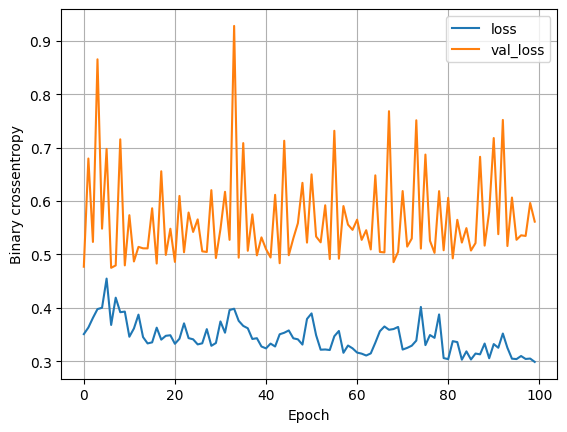

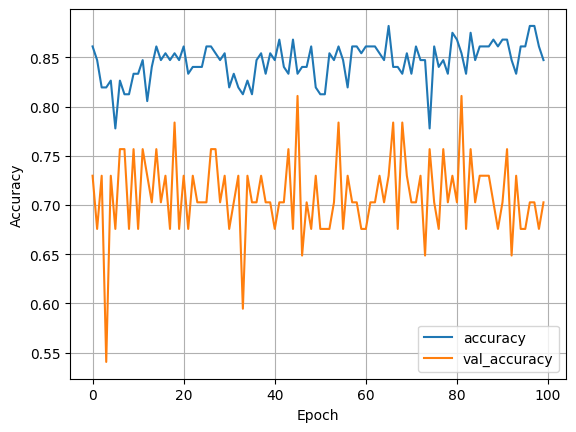

In [23]:
plot_loss(history)
plot_accuracy(history)